<a href="https://colab.research.google.com/github/aartivjadhav/machine_learning/blob/main/CandyProduction_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('candy_production.csv')

In [ ]:
data.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [ ]:
data.dtypes

observation_date     object
IPG3113N            float64
dtype: object

In [ ]:
data['observation_date'] = pd.to_datetime(data['observation_date'])

In [ ]:
data = data.set_index(['observation_date'])

In [ ]:
data.head()

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


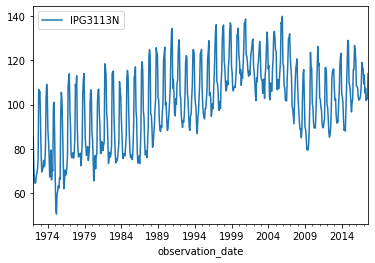

In [ ]:
data.plot()
plt.show()

In [ ]:
data.isna().sum()

IPG3113N    0
dtype: int64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose_data = seasonal_decompose(data)

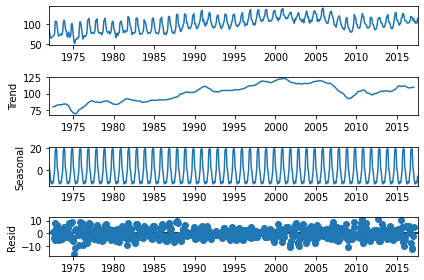

In [ ]:
decompose_data.plot();

In [ ]:
def stationarity_test(timeseries):
  timeseries.dropna(inplace=True)

  rolling_mean = timeseries.rolling(window=12).mean()
  rolling_std = timeseries.rolling(window=12).std()

  orig = plt.plot(timeseries,label = 'original')
  mean = plt.plot(rolling_mean,label = 'rolling_mean')
  std = plt.plot(rolling_std, label = 'rolling_std')

  plt.legend(loc='best')
  plt.title('original data with rolling mean and std')

  from statsmodels.tsa.stattools import adfuller

  dftest = adfuller(timeseries)
  dfoutput = pd.Series(dftest[0:4],index=['test statistic','p-value','#usedLags','NOBS'])

  print(dfoutput)

test statistic     -1.887050
p-value             0.338178
#usedLags          14.000000
NOBS              533.000000
dtype: float64


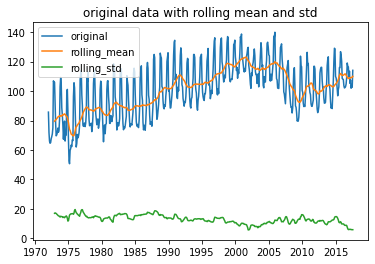

In [ ]:
stationarity_test(data)

In [ ]:
# as the p-value>0.05 that means we can't reject the null hypothesis and the signal is not stationary hence we need to differentiate again

test statistic     -1.841721
p-value             0.359954
#usedLags          15.000000
NOBS              532.000000
dtype: float64


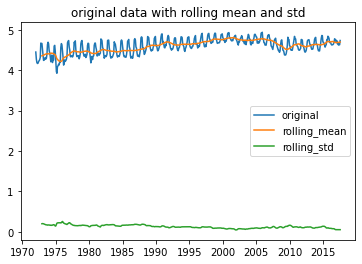

In [ ]:
loged_data = np.log(data)

stationarity_test(loged_data)

In [ ]:
# still the p-value>0.05 hence the timeseries is not stationary. we need to differentiate the data once more

In [ ]:
ma = loged_data.rolling(window=12).mean()

test statistic   -7.573451e+00
p-value           2.801611e-11
#usedLags         1.400000e+01
NOBS              5.220000e+02
dtype: float64


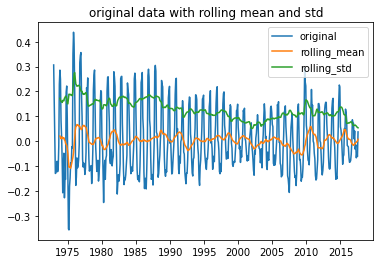

In [ ]:
data1 = loged_data-ma
stationarity_test(data1)

In [ ]:
# now the p-value<0.05 hence now the data is stationary

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


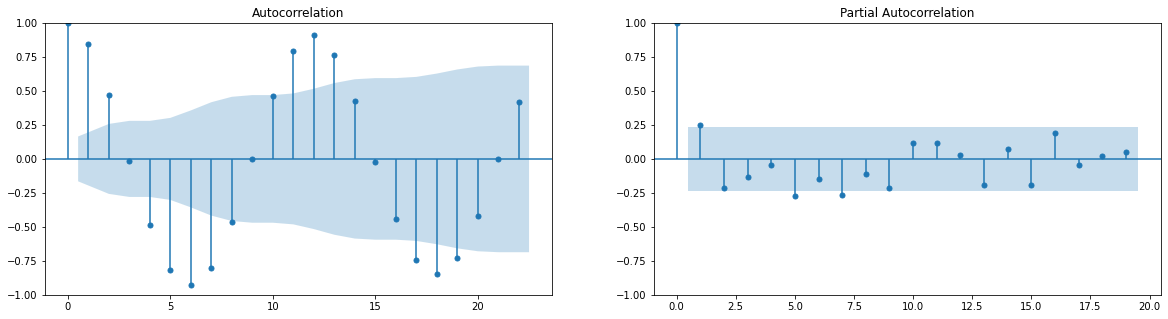

In [ ]:
lag_acf = acf(data1, nlags=140)
lag_pacf = pacf(data1, nlags=70)

fig,ax = plt.subplots(1,2,figsize=(20,5))

plot_acf(lag_acf,ax=ax[0])
plot_pacf(lag_pacf,ax=ax[1])

plt.show()

In [ ]:
# from graphs p=2,q=2,d=1
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
data1.dropna(inplace=True)
train,test=train_test_split(data1,test_size=0.1,shuffle=False)

In [ ]:
model_arima = ARIMA(train,order=(2,1,2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = model_arima_fit.predict(start='2013-03-01',end='2017-08-01')

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test,predictions)
print('test mse %.5f'%error)

test mse 0.00238


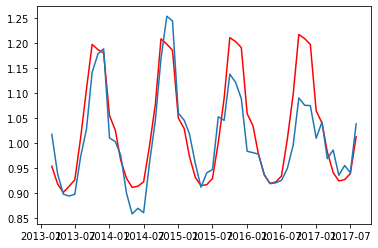

In [ ]:
predict = np.exp(predictions)
test_set = np.exp(test)

plt.plot(predict,color='red')
plt.plot(test_set)
plt.show()

In [ ]:
# SARIMAX

import statsmodels.api as sm

In [ ]:
model_sarimax = sm.tsa.statespace.SARIMAX(train,order=(2,1,2),seasonal_order=(2,1,2,12))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_sarimax_fit = model_sarimax.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = model_sarimax_fit.predict(start='2013-03-01',end='2017-08-01')